In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('LS_2.0.csv')
data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [6]:
data.shape

(2263, 19)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
STATE                                       2263 non-null object
CONSTITUENCY                                2263 non-null object
NAME                                        2263 non-null object
WINNER                                      2263 non-null int64
PARTY                                       2263 non-null object
SYMBOL                                      2018 non-null object
GENDER                                      2018 non-null object
CRIMINAL
CASES                              2018 non-null object
AGE                                         2018 non-null float64
CATEGORY                                    2018 non-null object
EDUCATION                                   2018 non-null object
ASSETS                                      2018 non-null object
LIABILITIES                                 2018 non-null object
GENERAL
VOTES                               2263

In [8]:
data.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data.isnull().sum()

STATE                                        0
CONSTITUENCY                                 0
NAME                                         0
WINNER                                       0
PARTY                                        0
SYMBOL                                       0
GENDER                                       0
CRIMINAL\nCASES                              0
AGE                                          0
CATEGORY                                     0
EDUCATION                                    0
ASSETS                                       0
LIABILITIES                                  0
GENERAL\nVOTES                               0
POSTAL\nVOTES                                0
TOTAL\nVOTES                                 0
OVER TOTAL ELECTORS \nIN CONSTITUENCY        0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    0
TOTAL ELECTORS                               0
dtype: int64

In [11]:
data['ASSETS']= data['ASSETS'].str.split('\n').str[0]
data['ASSETS'] = data['ASSETS'].str.split('Rs').str[1]
data['LIABILITIES']= data['LIABILITIES'].str.split('\n').str[0]
data['LIABILITIES']= data['LIABILITIES'].str.split('Rs').str[1]


In [12]:
data['ASSETS']= data['ASSETS'].str.replace(',','')
data['LIABILITIES']= data['LIABILITIES'].str.replace(',','')

In [13]:
data = data.dropna()

In [14]:
data.describe()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
count,1991.000000,1991.000000,1.991000e+03,1991.000000,1.991000e+03,1991.000000,1991.000000,1.991000e+03
mean,0.270718,52.357107,2.939856e+05,1114.790558,2.951004e+05,17.760497,26.047354,1.661313e+06
std,0.444442,11.864840,2.549466e+05,1668.321438,2.559389e+05,14.903515,21.423306,3.171484e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,44.000000,3.079650e+04,98.000000,3.088400e+04,1.956495,2.881582,1.530964e+06
50%,0.000000,53.000000,2.946620e+05,471.000000,2.947660e+05,18.410761,28.209323,1.683325e+06
75%,1.000000,61.000000,5.079785e+05,1558.000000,5.099180e+05,30.830137,44.546059,1.823664e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [15]:
data.STATE.value_counts()

Uttar Pradesh                247
Bihar                        212
Tamil Nadu                   182
Maharashtra                  175
West Bengal                  173
Andhra Pradesh               100
Madhya Pradesh                92
Rajasthan                     74
Odisha                        73
Karnataka                     72
Telangana                     72
Gujarat                       68
Jharkhand                     65
Kerala                        61
Punjab                        53
Assam                         43
Haryana                       41
Chhattisgarh                  38
Jammu & Kashmir               28
NCT OF Delhi                  24
Uttarakhand                   13
Manipur                       10
Arunachal Pradesh             10
Himachal Pradesh               9
Tripura                        8
Dadra & Nagar Haveli           6
Goa                            6
Meghalaya                      6
Andaman & Nicobar Islands      5
Mizoram                        5
Sikkim    

In [16]:
data.CONSTITUENCY.value_counts()

AURANGABAD    13
GAYA (SC)     11
UJIARPUR       8
SUPAUL         8
CHATRA         8
              ..
KANNAUJ        2
JAMMU          2
DIBRUGARH      2
KOPPAL         2
DEORIA         1
Name: CONSTITUENCY, Length: 539, dtype: int64

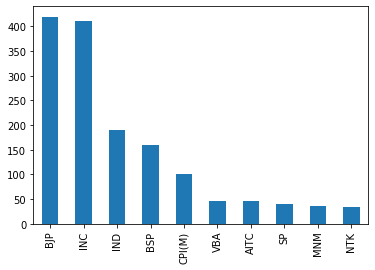

In [17]:
data.PARTY.value_counts()[:10].plot.bar()

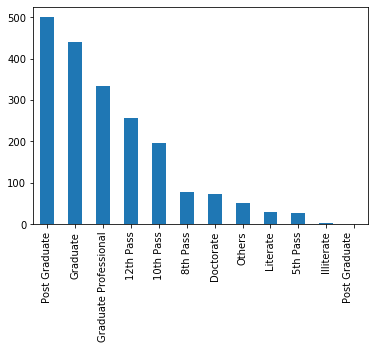

In [18]:
data.EDUCATION.value_counts().plot.bar()

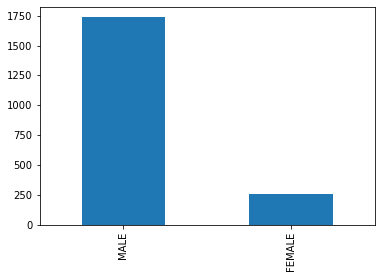

In [19]:
data.GENDER.value_counts().plot.bar()

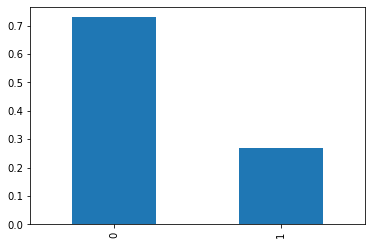

In [20]:
data.WINNER.value_counts(normalize = True).plot.bar()

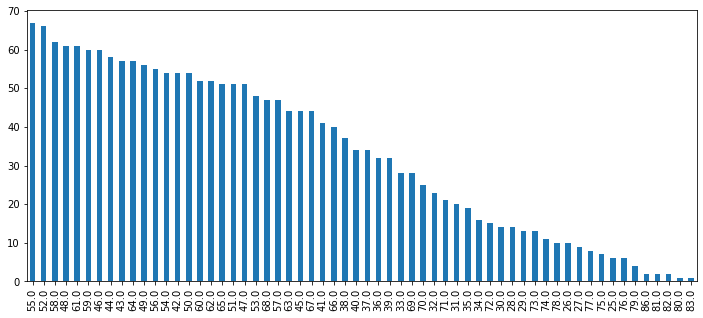

In [21]:
plt.figure(figsize = (12,5))
data.AGE.value_counts().plot.bar()

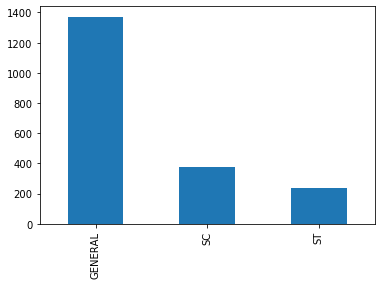

In [22]:
data.CATEGORY.value_counts().plot.bar()

In [23]:
data['ASSETS'] = data['ASSETS'].astype('int64')
data['LIABILITIES'] = data['LIABILITIES'].astype('int64')


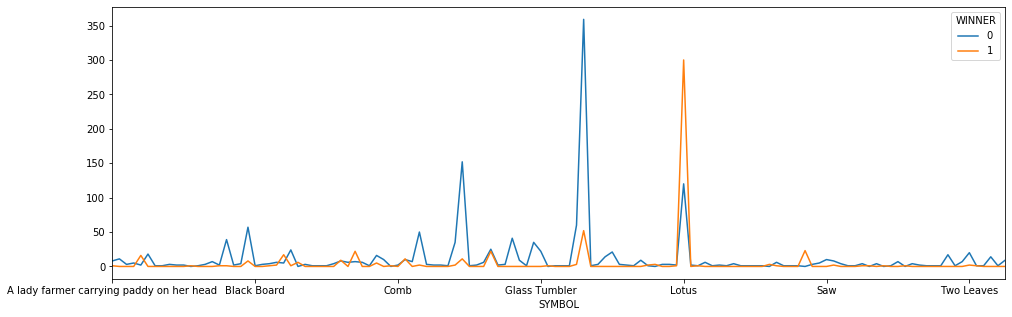

In [24]:
pd.crosstab(data['SYMBOL'],data['WINNER']).plot(figsize = (16,5))

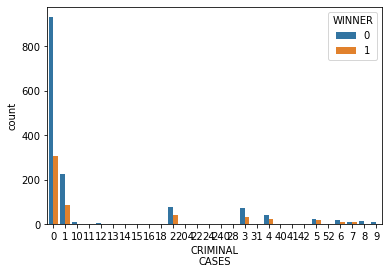

In [25]:
sns.countplot('CRIMINAL\nCASES',hue = 'WINNER',data = data)

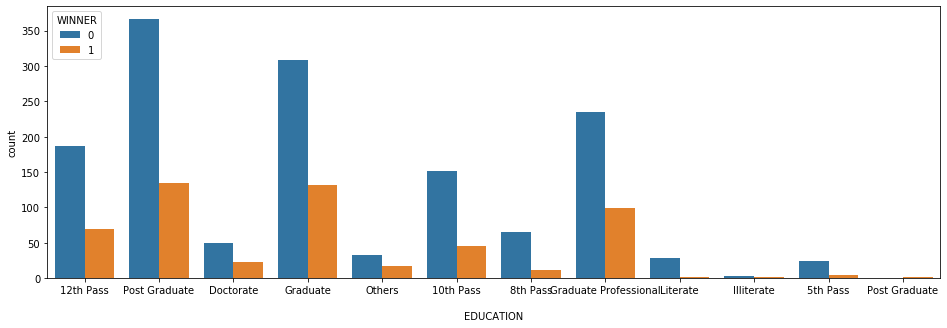

In [26]:
plt.figure(figsize = (16,5))
sns.countplot('EDUCATION',hue = 'WINNER',data = data)

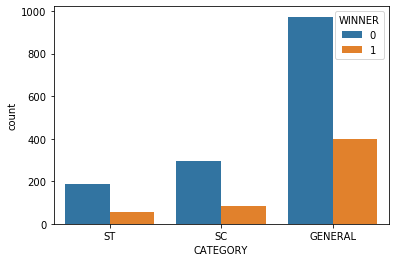

In [27]:
sns.countplot('CATEGORY',hue = 'WINNER',data = data)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
l = data.select_dtypes('object').columns
lb = LabelEncoder()
for i in l:
    data[i] = lb.fit_transform(data[i])

In [30]:
data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,31,0,1692,1,26,80,1,23,52.0,2,1,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,31,0,692,0,118,32,1,0,54.0,2,10,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,31,0,1481,0,46,66,1,16,52.0,2,1,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
4,33,1,1768,1,26,80,1,22,58.0,1,4,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690
5,33,1,1106,0,35,49,1,0,47.0,1,10,133784385,22251891,434199,1130,435329,22.466390,37.999125,1937690


In [31]:
X = data.drop(['NAME','WINNER'],axis =1)
y = data['WINNER']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 3)

In [34]:
import xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import lightgbm
from lightgbm import LGBMClassifier

In [35]:
models = []
models.append(('DecisionTreeClassifier:',DecisionTreeClassifier()))
models.append(('RandomForestClassifier:',RandomForestClassifier()))
models.append(('KNeighborsClassifier:',KNeighborsClassifier()))
models.append(('XGBOOST:',XGBClassifier()))
model_prediction = []

In [36]:
for i in models:
    model = i[1]
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    score = (accuracy_score(predict,y_test))
    model_prediction.append([i[0],score])

In [37]:
model_prediction = pd.DataFrame(model_prediction)
model_prediction.columns = ['Model Name','score']

In [38]:
model_prediction

,Model Name,score
0,DecisionTreeClassifier:,0.901338
1,RandomForestClassifier:,0.943144
2,KNeighborsClassifier:,0.702341
3,XGBOOST:,0.938127


In [39]:
results = []
names = []
scoring = 'accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits = 10,shuffle = True)
    cv_results = model_selection.cross_val_score(model,x_train,y_train,cv = kfold,scoring = scoring)
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean())

DecisionTreeClassifier: 0.9296197327852005
RandomForestClassifier: 0.9447173689619733
KNeighborsClassifier: 0.7006680369989723
XGBOOST: 0.9397225077081192


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
params = {'n_estimators':sp_randint(50,200),
         'max_features':sp_randint(1,24),
         'max_depth':sp_randint(2,10),
          'min_samples_split':sp_randint(2,20),
          'min_samples_leaf':sp_randint(1,20),
         'criterion':['gini','entropy']}

In [41]:
rfc = RandomForestClassifier(random_state=3)
rsearch = RandomizedSearchCV(rfc,param_distributions = params,n_jobs = -1,cv = 3,n_iter = 200,scoring = 'roc_auc',random_state =3,return_train_score = True)
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [42]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 12,
 'min_samples_leaf': 14,
 'min_samples_split': 5,
 'n_estimators': 97}

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
rfc= RandomForestClassifier(**rsearch.best_params_)
rfc.fit(X,y)
y_train_pred = rfc.predict(x_train)
y_train_prob = rfc.predict_proba(x_train)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

Confusion Matrix - Train: 
 [[991  23]
 [ 46 333]]


Overall Accuracy - Train:  0.9504666188083274
AUC - Train:  0.9897425489063404


Confusion Matrix - Test: 
 [[428  10]
 [ 17 143]]


Overall Accuracy - Test:  0.9548494983277592
AUC - Test:  0.9912671232876712


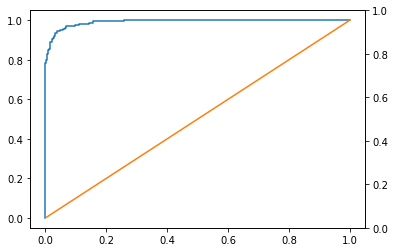

In [44]:
fpr,tpr,th=roc_curve(y_test,y_test_prob)
fig,ax=plt.subplots()
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
ax1=ax.twinx()

In [48]:
from sklearn.feature_selection import SelectFromModel

embeded_rf_selector = SelectFromModel(RandomForestClassifier(**rsearch.best_params_))
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')


2 selected features


In [49]:
print(embeded_rf_feature)

['OVER TOTAL ELECTORS \nIN CONSTITUENCY', 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY']
